In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras


In [2]:
from sklearn.datasets import fetch_california_housing
housing=fetch_california_housing()

In [3]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

### Data Set Characteristics:

##### Number of Instances:
 	
20640

##### Number of Attributes:
 	
8 numeric, predictive attributes and the target

##### Attribute Information:
 	
* MedInc median income in block
* HouseAge median house age in block
* AveRooms average number of rooms
* AveBedrms average number of bedrooms
* Population block population
* AveOccup average house occupancy
* Latitude house block latitude
* Longitude house block longitude

#### Target

The target variable is the median house value in units of 100,000 for California districts.

#### Documentation 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#examples-using-sklearn-datasets-fetch-california-housing

In [4]:
print(housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
from sklearn.model_selection import train_test_split
x_train_full,x_test_full,y_train_full,y_test=train_test_split(housing.data,housing.target,random_state=42)
X_train,x_valid,Y_train,y_valid=train_test_split(x_train_full, y_train_full,random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(X_train)
x_valid=scaler.fit_transform(x_valid)
x_test=scaler.fit_transform(x_test_full)


In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
x_train.shape

(11610, 8)

#### building model

In [16]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[8]), # we haven't use flatten because we already have 1 d array as an input 8 as input_shape becasue we have 8 features
    keras.layers.Dense(30,activation='relu'), ## next dense layer
    keras.layers.Dense(1) ## #output layer as we want to predict a regression value
    
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                270       
                                                                 
 dense_4 (Dense)             (None, 30)                930       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,231
Trainable params: 1,231
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss="mean_squared_error", 
              optimizer=keras.optimizers.SGD(lr=1e-3), 
              metrics=['mae'])

In [21]:
model_history=model.fit(x_train,Y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
363/363 [==============================] - 3s 7ms/step - loss: 2.1829 - mae: 1.0238 - val_loss: 0.8989 - val_mae: 0.6837
Epoch 2/30
363/363 [==============================] - 3s 7ms/step - loss: 0.8564 - mae: 0.6682 - val_loss: 0.7223 - val_mae: 0.6390
Epoch 3/30
363/363 [==============================] - 2s 6ms/step - loss: 0.6984 - mae: 0.6153 - val_loss: 0.6555 - val_mae: 0.6036
Epoch 4/30
363/363 [==============================] - 2s 7ms/step - loss: 0.6369 - mae: 0.5846 - val_loss: 0.6249 - val_mae: 0.5968
Epoch 5/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5907 - mae: 0.5611 - val_loss: 0.5845 - val_mae: 0.5724
Epoch 6/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5516 - mae: 0.5410 - val_loss: 0.5610 - val_mae: 0.5619
Epoch 7/30
363/363 [==============================] - 2s 4ms/step - loss: 0.5213 - mae: 0.5237 - val_loss: 0.5370 - val_mae: 0.5460
Epoch 8/30
363/363 [==============================] - 2s 5ms/step - loss: 0.

In [24]:
model_evaluate=model.evaluate(x_test,y_test)
model_evaluate

162/162 [==============================] - 0s 2ms/step - loss: 0.3794 - mae: 0.4473


[0.37937143445014954, 0.4473344087600708]

In [27]:
pd.DataFrame(model_history.history) ## to get what are the KPI values in each run of epocs 

,loss,mae,val_loss,val_mae
0,2.182945,1.023833,0.898879,0.683700
1,0.856369,0.668232,0.722277,0.639008
2,0.698385,0.615325,0.655547,0.603638
3,0.636872,0.584647,0.624923,0.596787
4,0.590663,0.561122,0.584493,0.572405
5,0.551595,0.540952,0.560997,0.561857
6,0.521343,0.523705,0.536978,0.545966
7,0.497006,0.510157,0.521483,0.537789
8,0.477749,0.499634,0.508443,0.530631
9,0.462703,0.490663,0.497249,0.523055


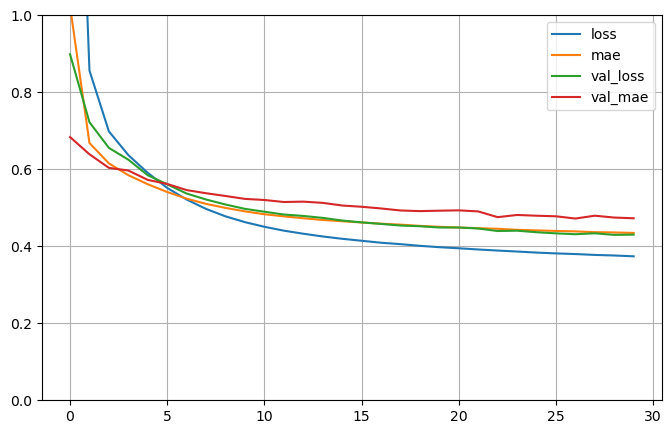

In [28]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

plt.show()

In [30]:
### prediction only for few x_test values 
x_new=x_test[:3]
x_new

array([[-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
         0.56243986,  0.22075674,  0.2580042 ],
       [-0.69738315,  0.09834786, -0.14086589,  0.17205266,  0.13229717,
        -0.17390163, -0.20888265,  0.0337006 ],
       [-0.19475766,  1.85735988, -0.54547279,  0.15860488, -0.09942866,
        -0.98514082,  1.03333558, -1.45168768]])

In [33]:
y_pred=model.predict(x_new)
print(y_pred)## now check it with the actual values of y_test in the nextcell

1/1 [==============================] - 0s 29ms/step
[[0.70641863]
 [1.7963738 ]
 [4.0170426 ]]


In [32]:
print(y_test[:3])

[0.477   0.458   5.00001]
